In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [52]:
import pandas as pd

# Load the data
df = pd.read_csv('./Microsoft_Stock.csv', parse_dates=['Date'])
# df = pd.read_csv('/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv', parse_dates=['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the first few rows
print(df.head())


                      Open   High    Low  Close    Volume
Date                                                     
2015-04-01 16:00:00  40.60  40.76  40.31  40.72  36865322
2015-04-02 16:00:00  40.66  40.74  40.12  40.29  37487476
2015-04-06 16:00:00  40.34  41.78  40.18  41.55  39223692
2015-04-07 16:00:00  41.61  41.91  41.31  41.53  28809375
2015-04-08 16:00:00  41.48  41.69  41.04  41.42  24753438


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [54]:
# 1. compute min/max for all numeric columns
summary = df.agg(['min', 'max'])

# 2. grab the min/max of the Date index
min_date, max_date = df.index.min(), df.index.max()

# 3. add them into the summary as a new column
summary['Date'] = [min_date, max_date]

print(summary)


       Open    High     Low   Close     Volume                Date
min   40.34   40.74   39.72   40.29     101612 2015-04-01 16:00:00
max  245.03  246.13  242.92  244.99  135227059 2021-03-31 16:00:00


Line chart of closing prices

<Axes: title={'center': 'MSFT Closing Price'}, xlabel='Date'>

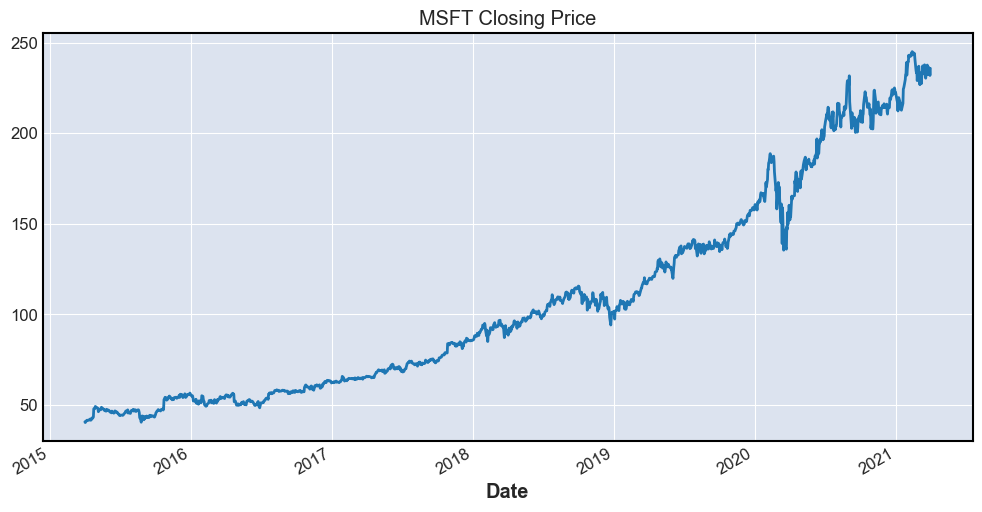

In [55]:
df['Close'].plot(figsize=(12,6), title="MSFT Closing Price")

Candlestick (OHLC) chart

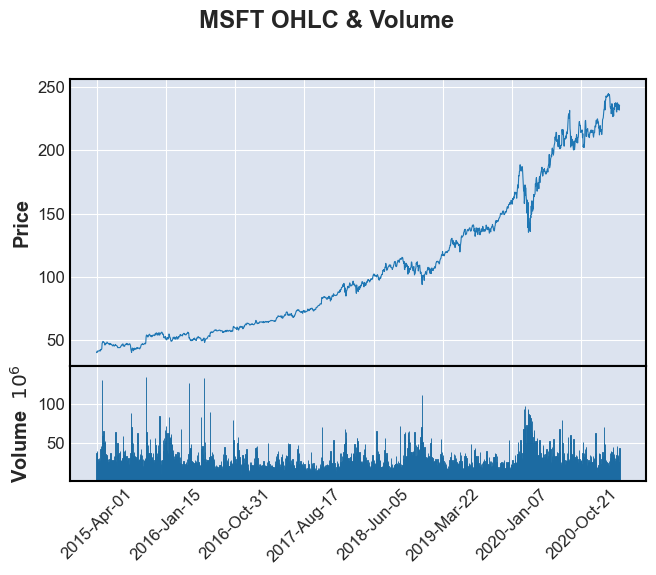

In [56]:
import mplfinance as mpf

# if your index is currently dates (or strings), coerce it back into a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Plot the OHLC data with volume
mpf.plot(df, type='line', volume=True, title="MSFT OHLC & Volume")

Moving Averages

<Axes: title={'center': 'Close + MA20/MA50'}, xlabel='Date'>

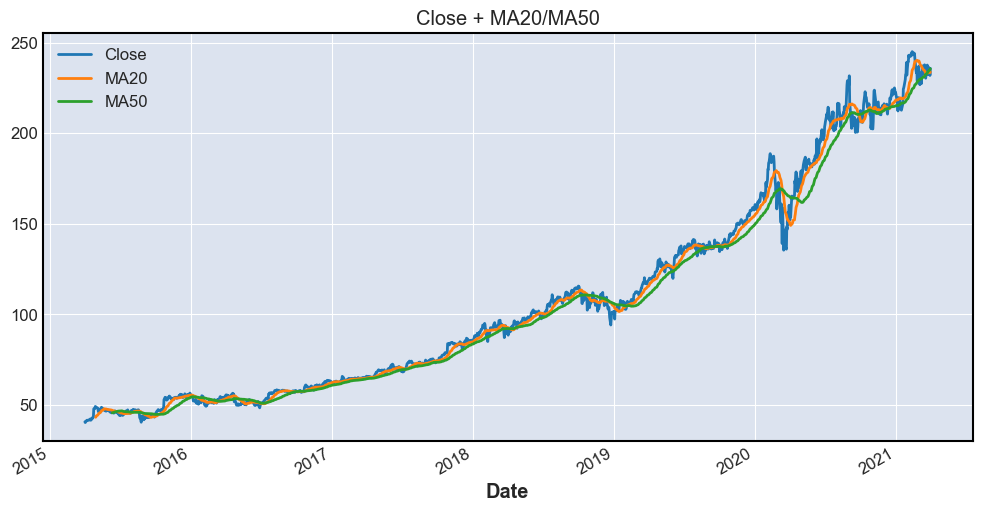

In [57]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df[['Close','MA20','MA50']].plot(figsize=(12,6), title="Close + MA20/MA50")

Daily Returns Histogram

<Axes: >

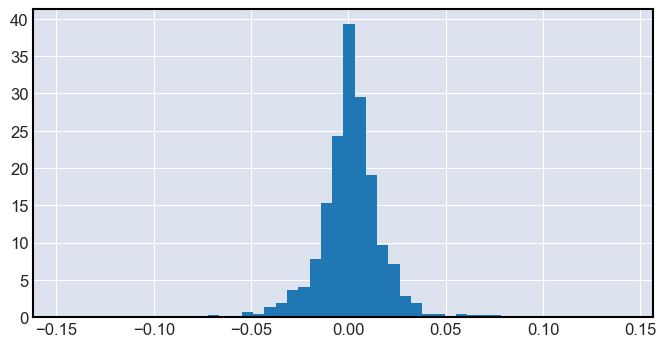

In [58]:
df['Ret'] = df['Close'].pct_change()
df['Ret'].hist(bins=50, figsize=(8,4), density=True)

Rolling volatility (standard deviation)

<Axes: title={'center': '20-Day Annualized Volatility'}, xlabel='Date'>

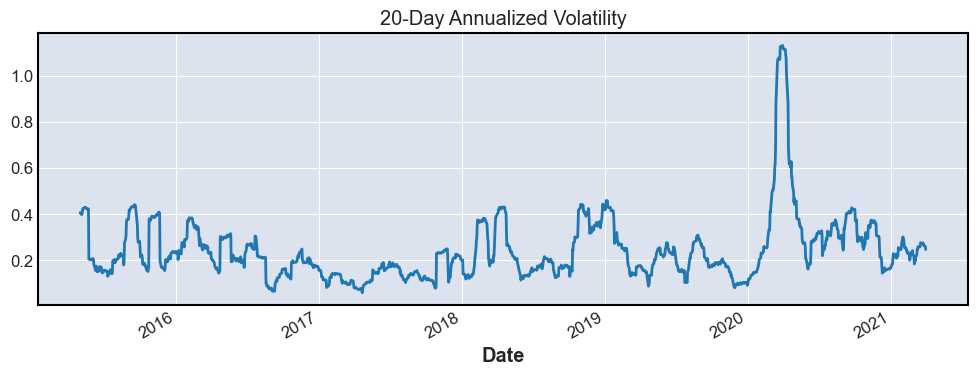

In [59]:
df['Vol20'] = df['Ret'].rolling(20).std() * np.sqrt(252)
df['Vol20'].plot(figsize=(12,4), title="20-Day Annualized Volatility")

Scatter plot: returns vs. volume

<Axes: xlabel='Ret', ylabel='Volume'>

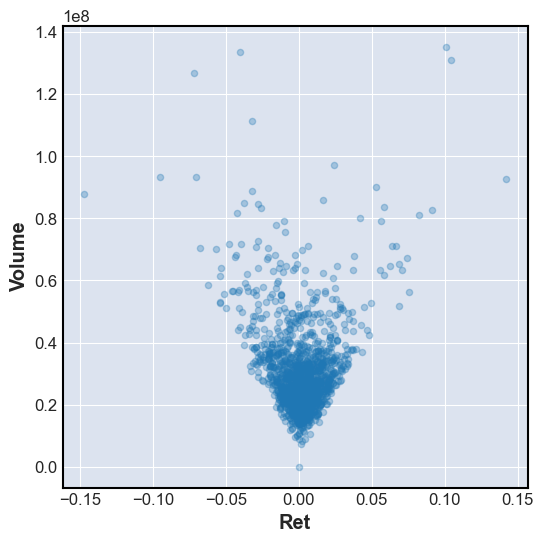

In [60]:
df.plot.scatter(x='Ret', y='Volume', alpha=0.3, figsize=(6,6))

Correlation Heatmap

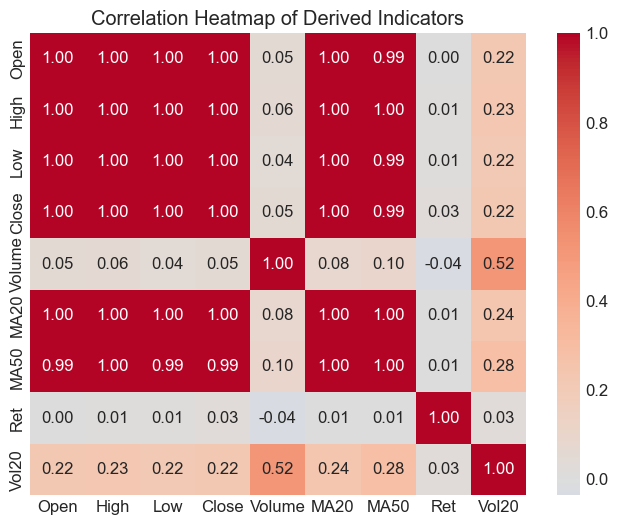

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Derived Indicators')
plt.show()


Monthly Box Plot

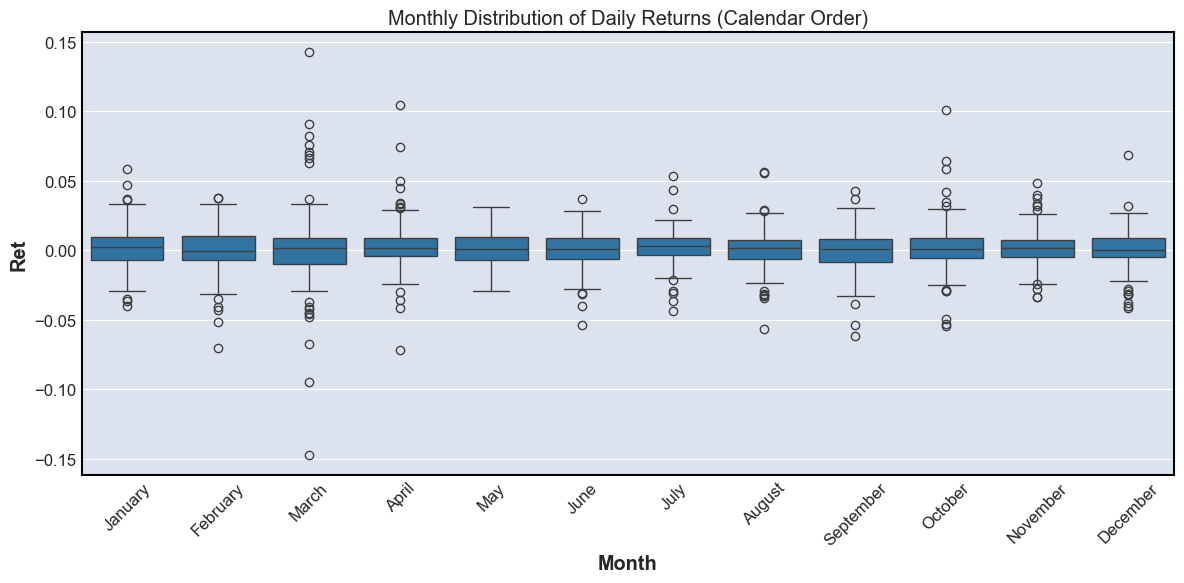

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# define calendar order
month_order = list(calendar.month_name)[1:]  # ['January', 'February', ..., 'December']

# convert to ordered categorical so seaborn respects it
df['Month'] = pd.Categorical(df.index.month_name(),
                             categories=month_order,
                             ordered=True)

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Ret', data=df, order=month_order)
plt.title('Monthly Distribution of Daily Returns (Calendar Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Yearly Box Plot

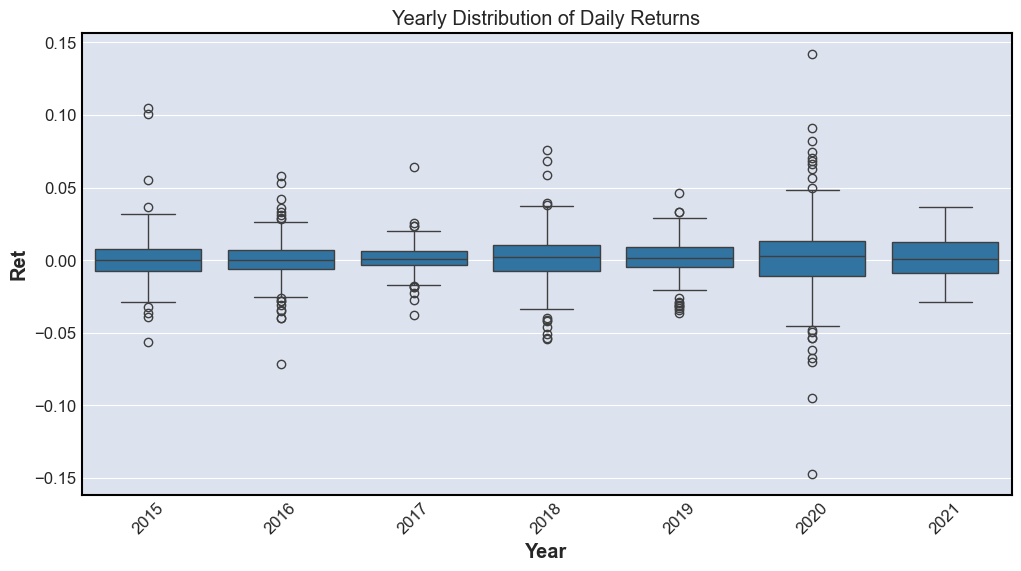

In [63]:
# Yearly boxplot
df['Year'] = df.index.year
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='Ret', data=df)
plt.title('Yearly Distribution of Daily Returns')
plt.xticks(rotation=45)
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Open    1511 non-null   float64 
 1   High    1511 non-null   float64 
 2   Low     1511 non-null   float64 
 3   Close   1511 non-null   float64 
 4   Volume  1511 non-null   int64   
 5   MA20    1492 non-null   float64 
 6   MA50    1462 non-null   float64 
 7   Ret     1510 non-null   float64 
 8   Vol20   1491 non-null   float64 
 9   Month   1511 non-null   category
 10  Year    1511 non-null   int32   
dtypes: category(1), float64(8), int32(1), int64(1)
memory usage: 125.8 KB
